## Example-3

In [1]:
import dabl

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(dabl.datasets.data_path("adult.csv.gz"))

data_clean = dabl.clean(data)[::10]

The first step in any data analysis is data cleaning. dabl tries to detect the types of your data and apply appropriate conversions. It also tries to detect potential data quality issues. The field of data cleaning is impossibly broad, and dabl’s approaches are by no means sophisticated. The goal of dabl is to get the data “clean enough” to create useful visualizations and models, and to allow users to perform custom cleaning operations themselves. In particular if the detection of semantic types (continuous, categorical, ordinal, text, etc) fails, the user can provide type_hints:

In [3]:
data_clean = dabl.clean(data, type_hints={"capital-gain": "continuous"})

### Exploratory Data analysis

Target looks like classification
Linear Discriminant Analysis training set score: 0.530


[[<Figure size 600x600 with 6 Axes>,
  <Figure size 800x400 with 2 Axes>,
  <Figure size 640x480 with 1 Axes>],
 None]

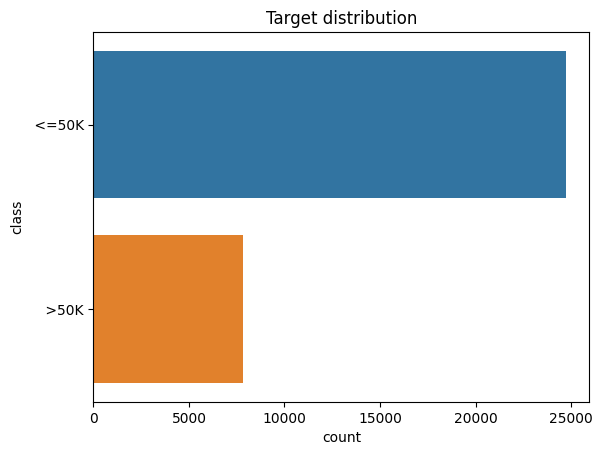

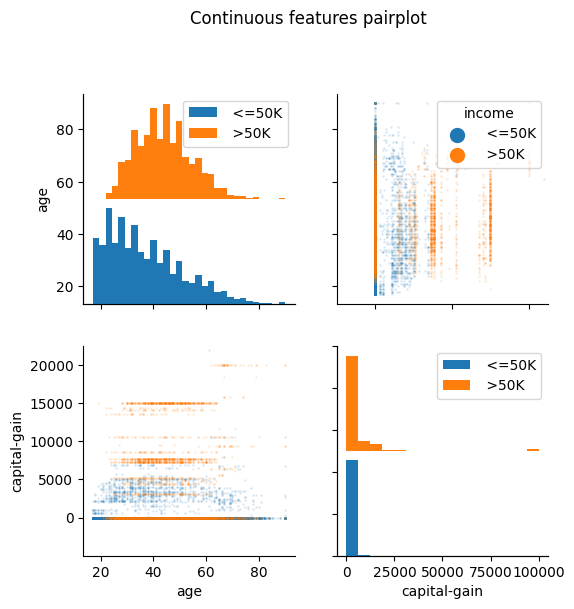

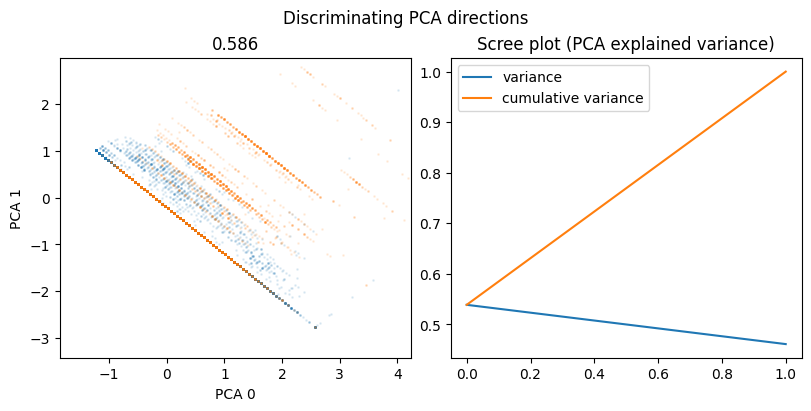

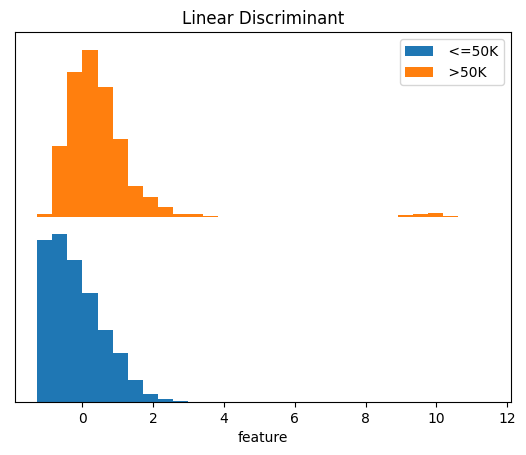

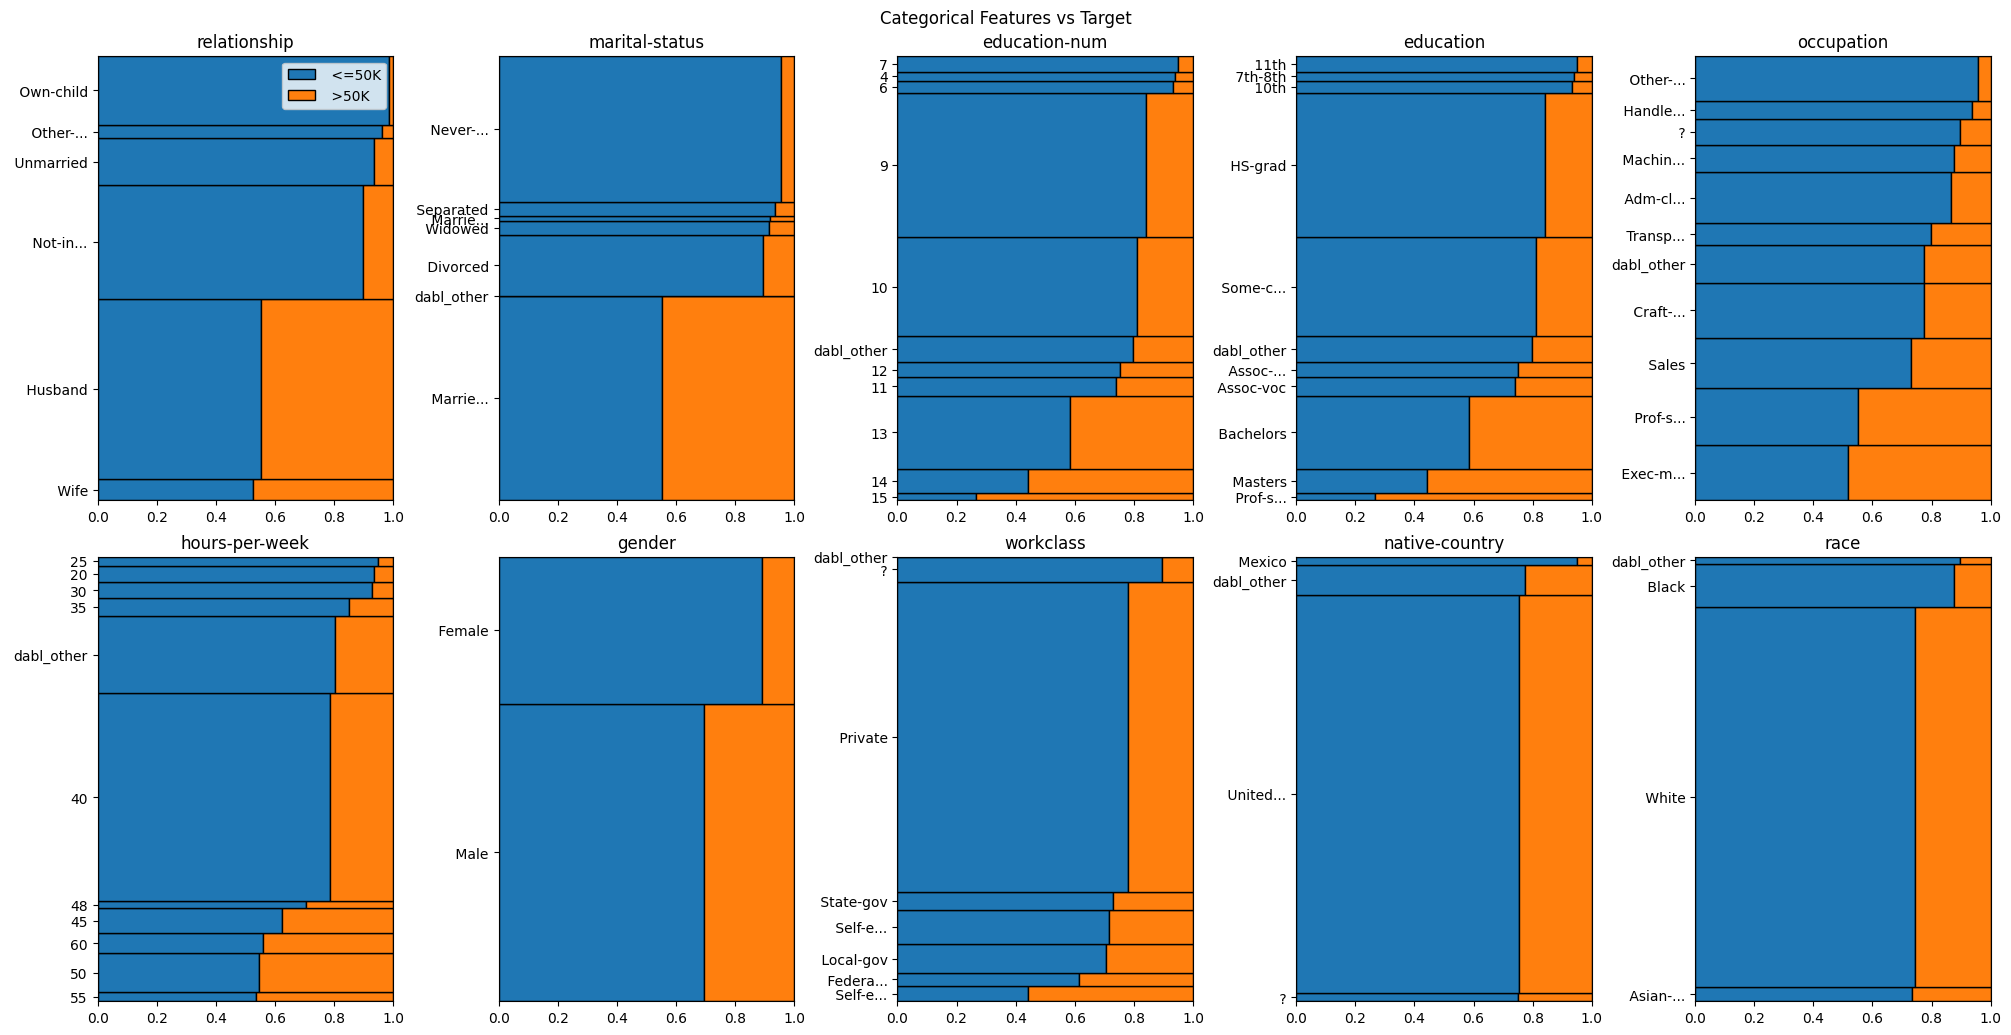

In [4]:
dabl.plot(data, target_col="income")

#Target looks like classification
#Linear Discriminant Analysis training set score: ...

The next step in any task should be exploratory data analysis. dabl provides a high-level interface that summarizes several common high-level plots. For low dimensional datasets, all features are shown; for high dimensional datasets, only the most informative features for the given task are shown. This is clearly not guaranteed to surface all interesting aspects with the data, or to find all data quality issues. However, it will give you a quick insight in to what are the important features, their interactions, and how hard the problem might be. It also allows a good assessment of whether there is any data leakage through spurious representations of the target in the data.

### Initial Model Building

In [5]:
ec = dabl.SimpleClassifier(random_state=0).fit(data, target_col="income") 

Running DummyClassifier(random_state=0)
accuracy: 0.759 average_precision: 0.241 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.432
=== new best DummyClassifier(random_state=0) (using recall_macro):
accuracy: 0.759 average_precision: 0.241 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.432

Running GaussianNB()
accuracy: 0.409 average_precision: 0.289 roc_auc: 0.609 recall_macro: 0.607 f1_macro: 0.407
=== new best GaussianNB() (using recall_macro):
accuracy: 0.409 average_precision: 0.289 roc_auc: 0.609 recall_macro: 0.607 f1_macro: 0.407

Running MultinomialNB()
accuracy: 0.831 average_precision: 0.772 roc_auc: 0.908 recall_macro: 0.815 f1_macro: 0.787
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.831 average_precision: 0.772 roc_auc: 0.908 recall_macro: 0.815 f1_macro: 0.787

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=0)
accuracy: 0.710 average_precision: 0.417 roc_auc: 0.759 recall_macro: 0.759 f1_macro: 0.682
Running DecisionT

The SimpleClassifier also performs preprocessing such as missing value imputation and one-hot encoding. You can inspect the model using:

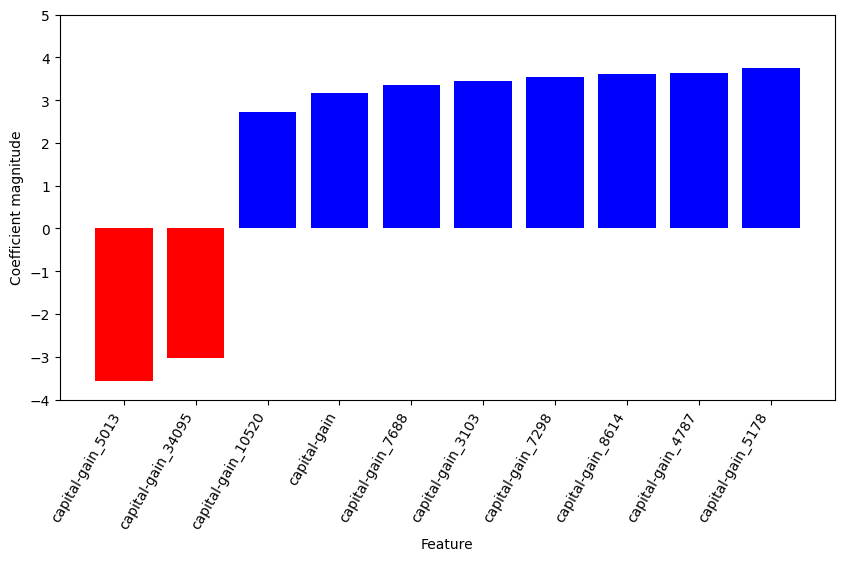

In [6]:
dabl.explain(ec) 

This can lead to additional insights and guide custom processing and cleaning of the data.

### Enhanced Model Building

In [7]:
 ac = AnyClassifier().fit(data, target_col="income") #not implemented yet

NameError: name 'AnyClassifier' is not defined

In [8]:
explain(ac)

NameError: name 'explain' is not defined